# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
data = pd.read_csv('used_device_data.csv')

In [3]:
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


#### Observations

- The DataFrame represents data related to mobile phones, including information about brand, operating system, screen size, camera specifications, memory, battery, weight, release year, usage duration, and normalized prices.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

#### Observations

- The DataFrame contains 3454 rows and 15 columns .
- Some of the columns have missing values.
- The DataFrame contains 4 columns with object datatype, 9 columns with float64 datatype, and 2 columns with int64 datatype.

In [7]:
df.shape

(3454, 15)

In [8]:
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


#### Observations

- The 'brand_name' column has 3454 entries, with 34 unique values. The most common brand is 'Others', which appears 502 times.
- The 'os' column has 3454 entries, with 4 unique values. The most common operating system is 'Android', with 3214 occurrences.
- The average screen size is 13.71, with a standard deviation of 3.81.The min  screen size is 5.08, and the max  is 30.71.
- The '4g' column has 3454 entries, with 2 unique values. The most frequent value is 'yes', appearing 2335 times.
- The '5g' column has 3454 entries, with 2 unique values. The most frequent value is 'no', appearing 3302 times.
- The average main camera megapixels is 9.46, with a standard deviation of 4.82. The min value is 0.08, and the max is 48.0.
- The average selfie camera megapixels is 6.55, with a standard deviation of 6.97. The min value is 0.0, and the max is 32.0.
- The average internal memory size is 54.57, with a standard deviation of 84.97. The min value is 0.01, and the max is 1024.0.
- The average RAM size is 4.04, with a standard deviation of 1.37. The minimum value is 0.02, and the maximum is 12.0.
- The average battery capacity is 3133.40, with a standard deviation of 1299.68. The min value is 500.0, and the max is 9720.0.
- The average weight is 182.75, with a standard deviation of 88.41. The minimum weight is 69.0, and the maximum is 855.0.
- The average release year is 2015.97, with a standard deviation of 2.30.The min year is 2013.0, and the max is 2020.0.
- The average usage duration is 674.87 days, with a standard deviation of 248.58 days.The min duration is 91.0 days, and the max is 1094.0 days.
- The average normalized used price is 4.36, with a standard deviation of 0.59.The min price is 1.54, and the max is 6.62.
- The average normalized new price is 5.23, with a standard deviation of 0.68.The min price is 2.90, and the max is 7.85.

In [9]:
df.value_counts()

brand_name  os       screen_size  4g   5g  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  weight  release_year  days_used  normalized_used_price  normalized_new_price
Acer        Android  7.75         no   no  3.00            0.3               16.0        4.0  1300.0   110.0   2013          942        3.485845               4.611053                1
Others      Android  12.83        yes  no  16.00           8.0               32.0        4.0  4000.0   203.0   2018          645        5.163471               6.109670                1
                                           13.00           8.0               64.0        4.0  6180.0   167.5   2017          720        4.422208               5.515242                1
                                                                             128.0       4.0  3020.0   140.0   2017          623        4.882423               6.110358                1
                                                           13.0              32.

In [10]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Observations

- The main_camera_mp column has 179 missing values.
- The selfie_camera_mp column has 2 missing values.
- The int_memory column has 4 missing values.
- The ram column has 4 missing values.
- The battery column has 6 missing values.
- The weight column has 7 missing values.

In [11]:
df.duplicated().sum()

0

#### Observations

- There are no duplicate values in the data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

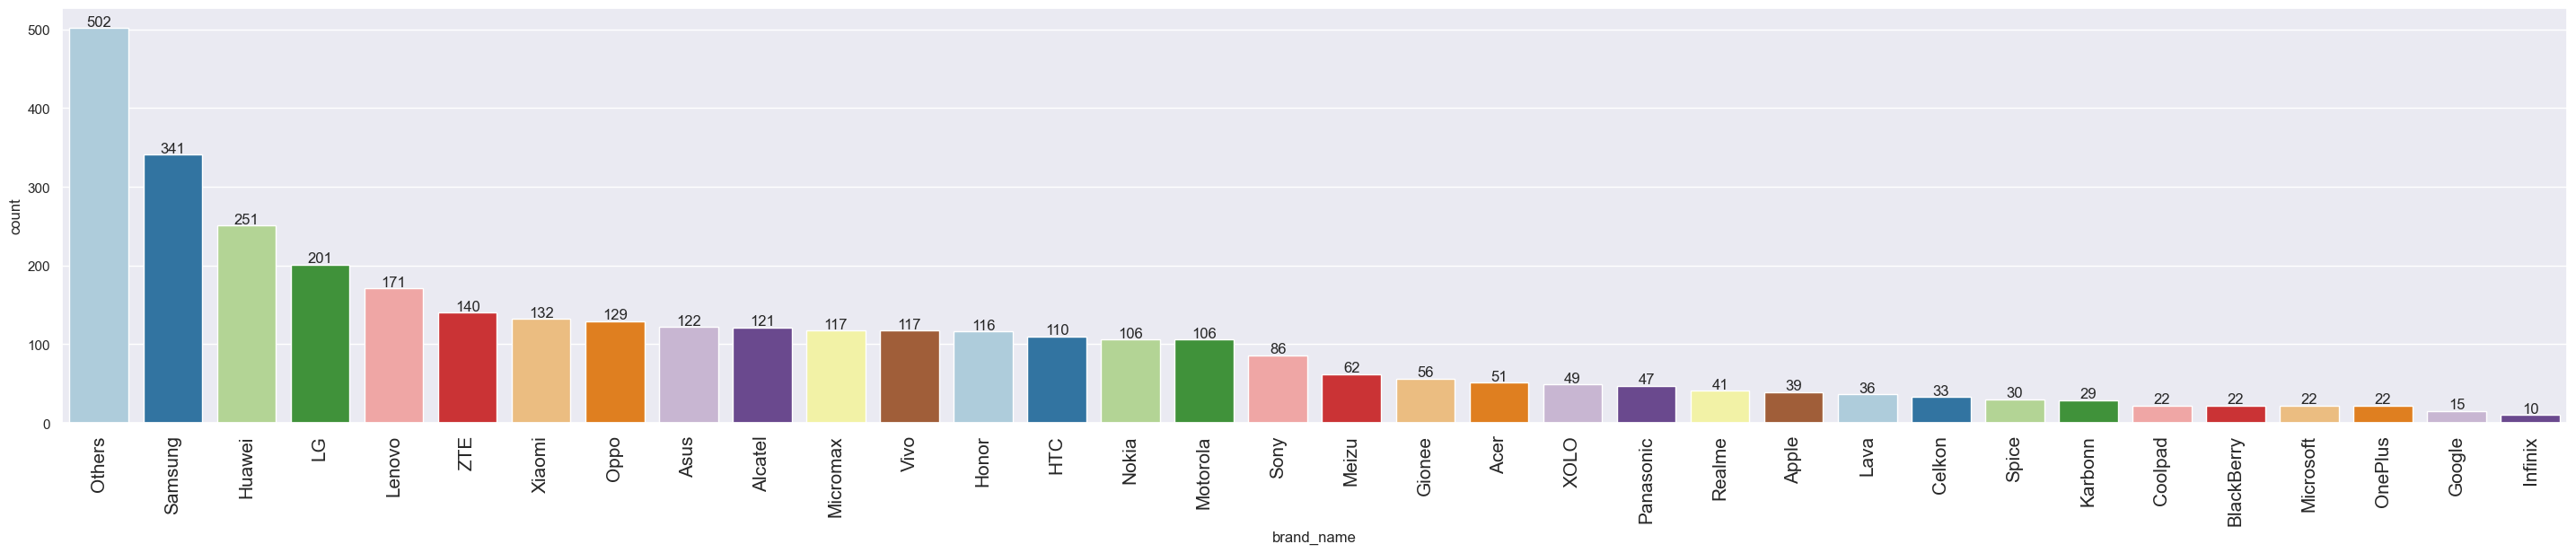

In [14]:
labeled_barplot(df, "brand_name")

-  There are 3454 data points with 34 unique brands. The most frequent brand is "Others" with 502 occurrences.

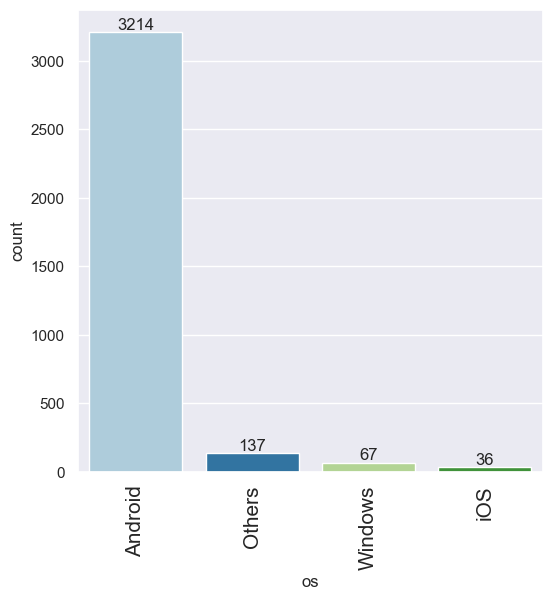

In [15]:
labeled_barplot(df, "os")

- The most frequent OS is "Android" with 3214 occurrences.

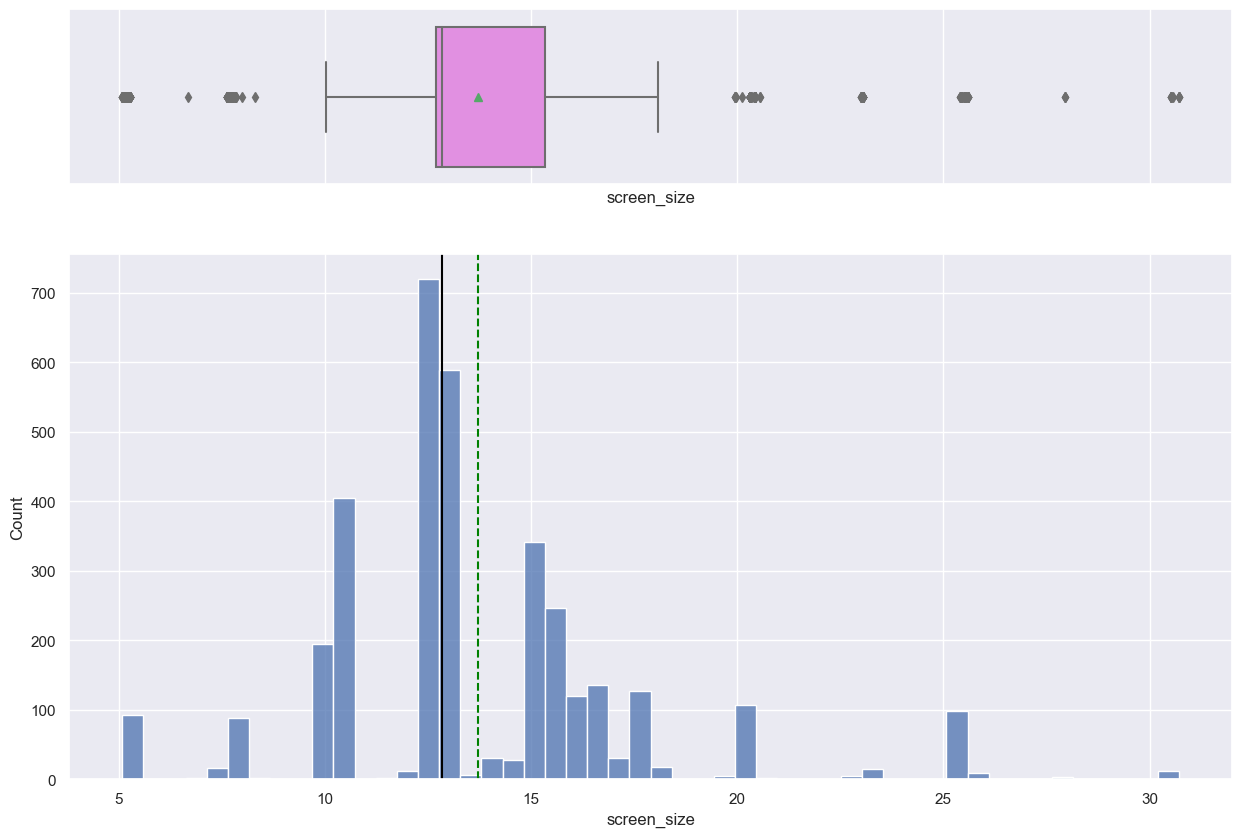

In [16]:
histogram_boxplot(df, "screen_size",bins=50)

* The distribution for duration column is right-skewed.
* The minimum screen size is 5.08 inches, and the maximum is 30.71 inches.

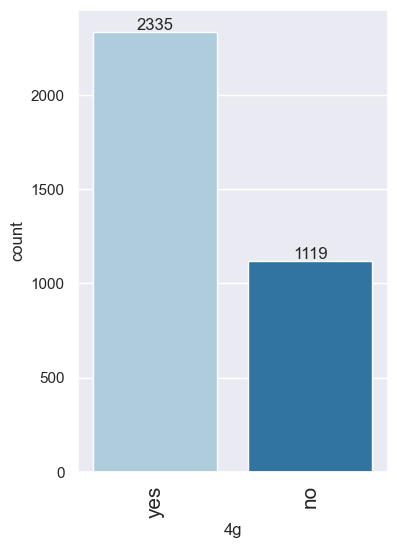

In [17]:
labeled_barplot(df, "4g")

- There are 3454 data points with 2 unique values ("yes" and "no"). "yes" appears 2335 times.

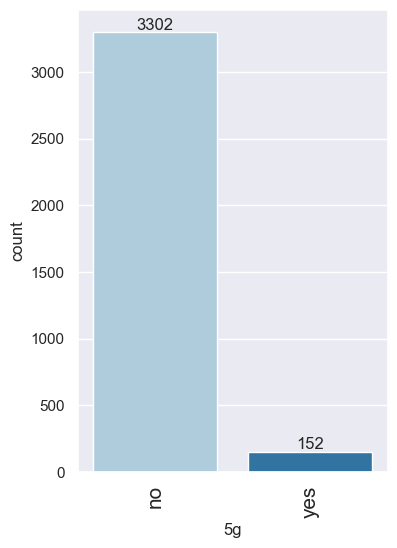

In [18]:
labeled_barplot(df, "5g")

- There are 3454 data points with 2 unique values ("yes" and "no"). "no" appears 3302 times.

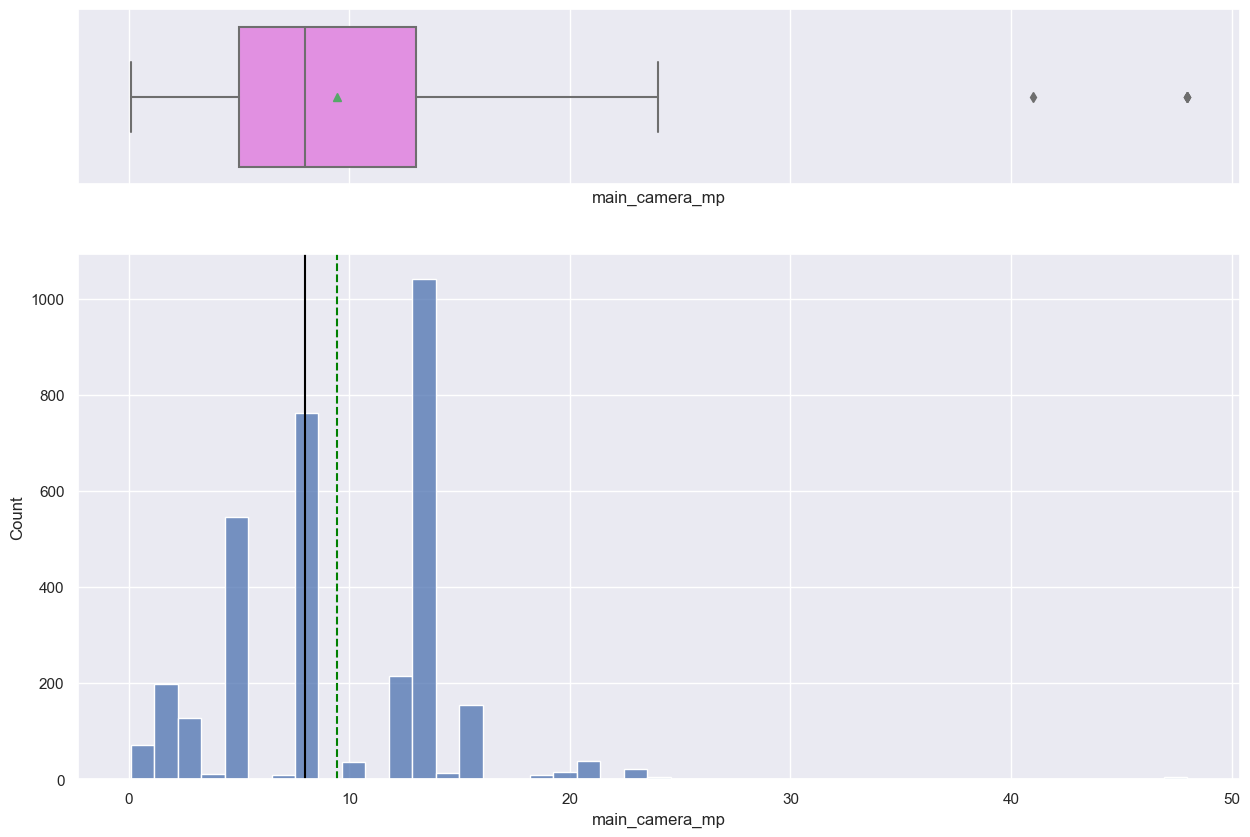

In [19]:
histogram_boxplot(df, "main_camera_mp")

- he main camera resolution data is numerical, with an average of approximately 9.46 MP. The minimum resolution is 0.08 MP, and the maximum is 48.0 MP.

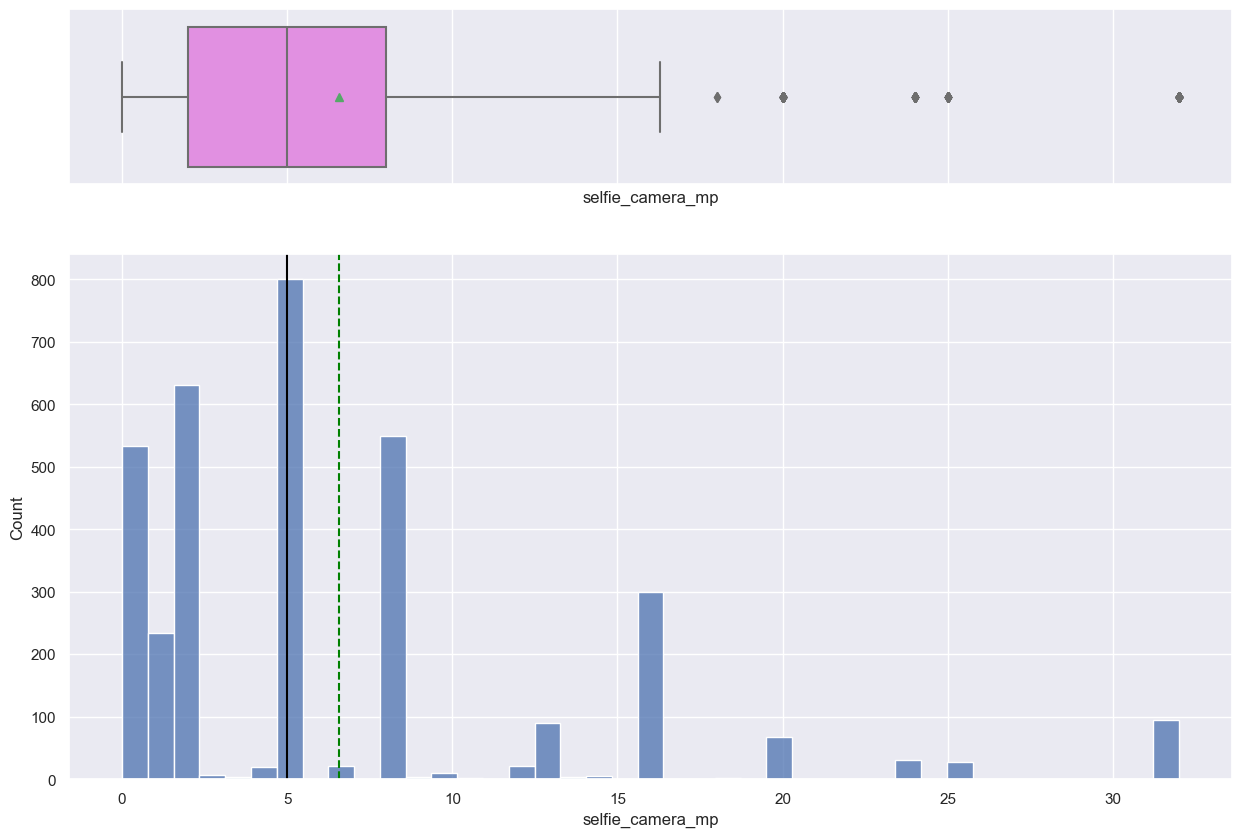

In [20]:
histogram_boxplot(df, "selfie_camera_mp")

- The selfie camera resolution data is numerical, with an average of approximately 6.55 MP.
- The minimum resolution is 0.0 MP, and the maximum is 32.0 MP.

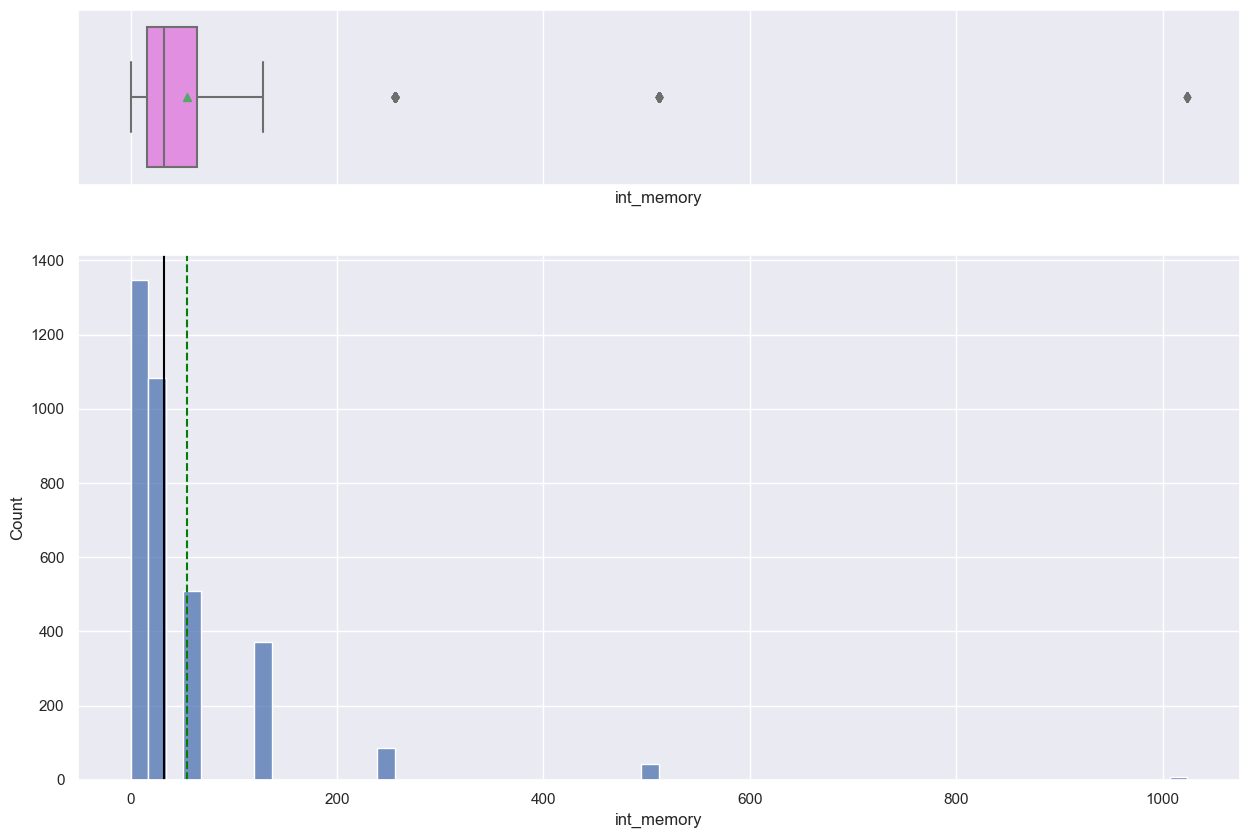

In [21]:
histogram_boxplot(df, "int_memory",bins=60)

- The minimum internal memory is 0.01 GB, and the maximum is 1024.0 GB.

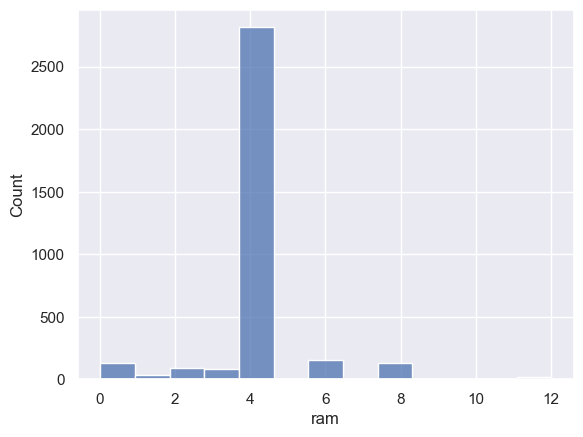

In [22]:
sns.histplot(data=df, x="ram")
plt.show()

-  The minimum RAM is 0.02 GB, and the maximum is 12.0 GB.

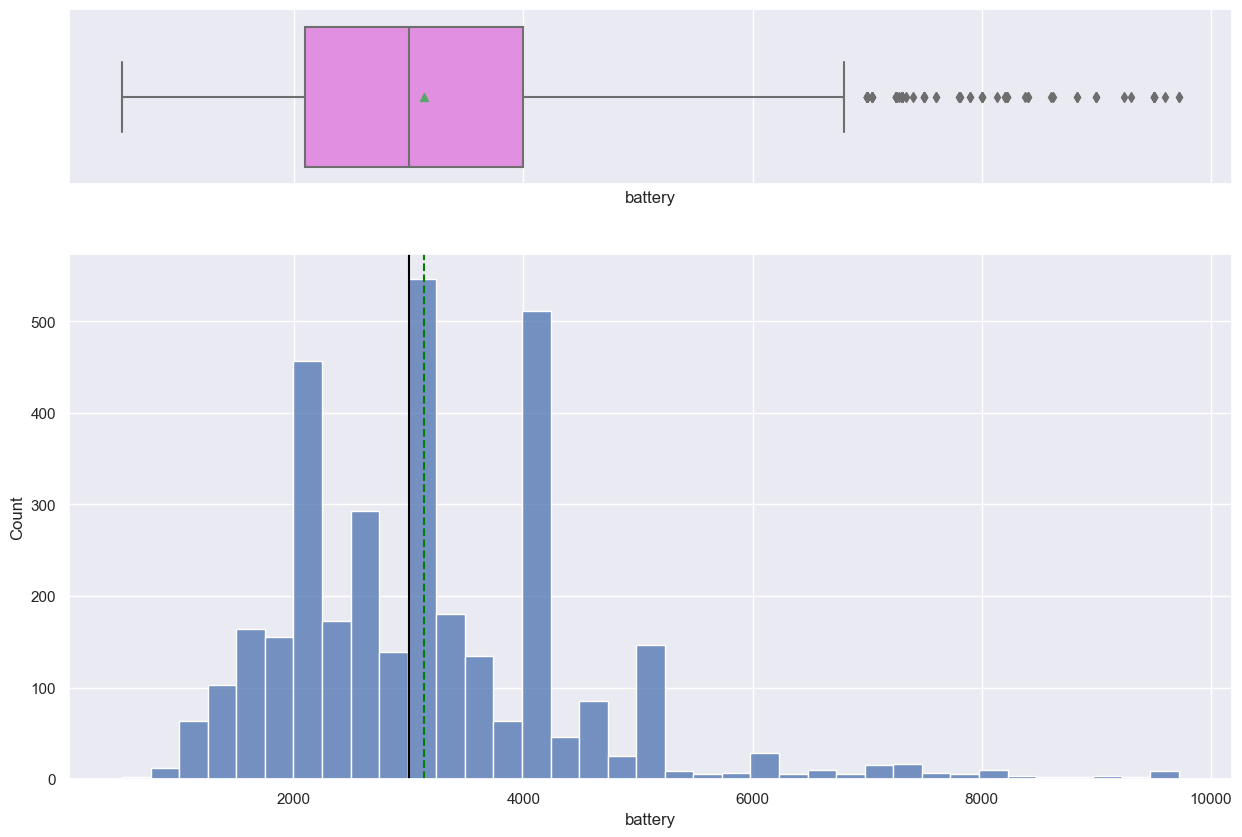

In [23]:
histogram_boxplot(df, "battery")

- Battery capacity data is numerical, with an average of approximately 3133.40 mAh and a standard deviation of about 1299.68 mAh. The minimum capacity is 500 mAh, and the maximum is 9720 mAh.

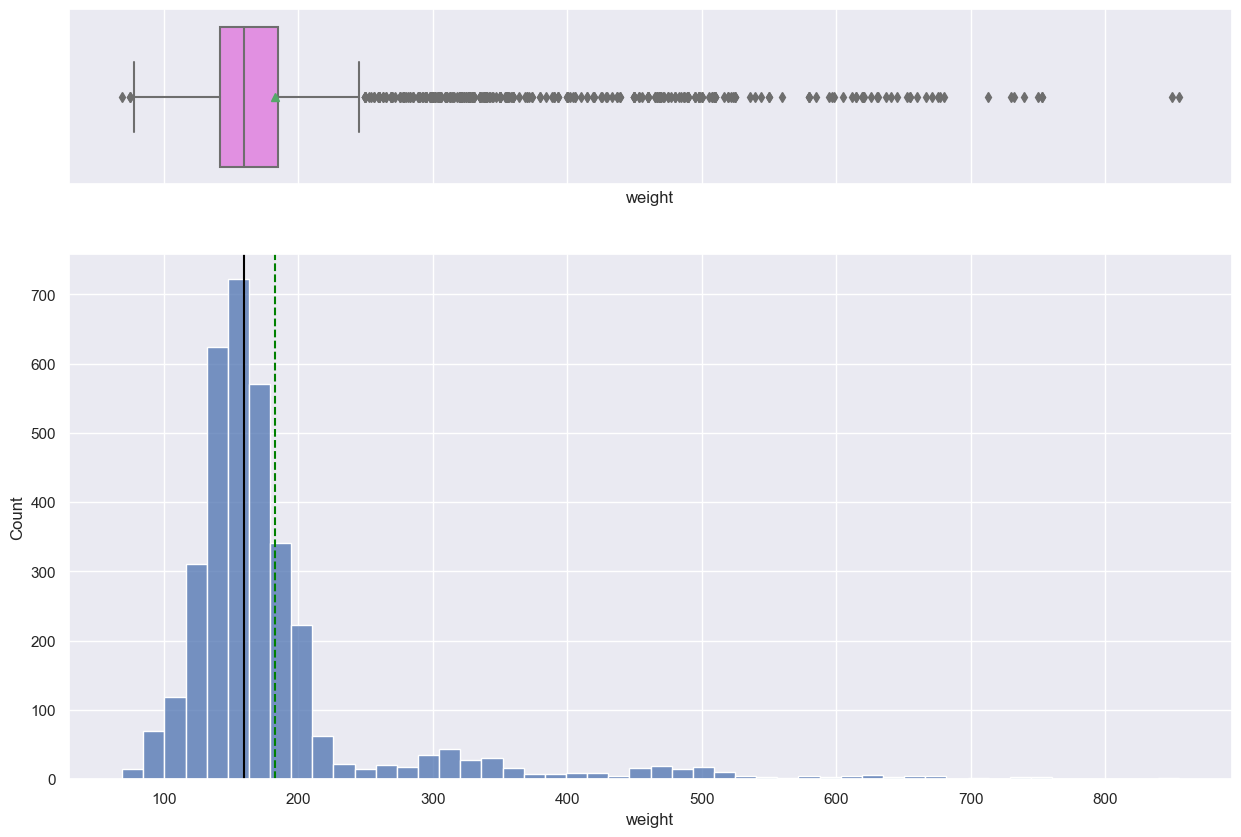

In [24]:
histogram_boxplot(df, "weight",bins=50)

- The distribution for weight is heavily right-skewed.
-  The minimum capacity is 500 mAh, and the maximum is 9720 mAh.

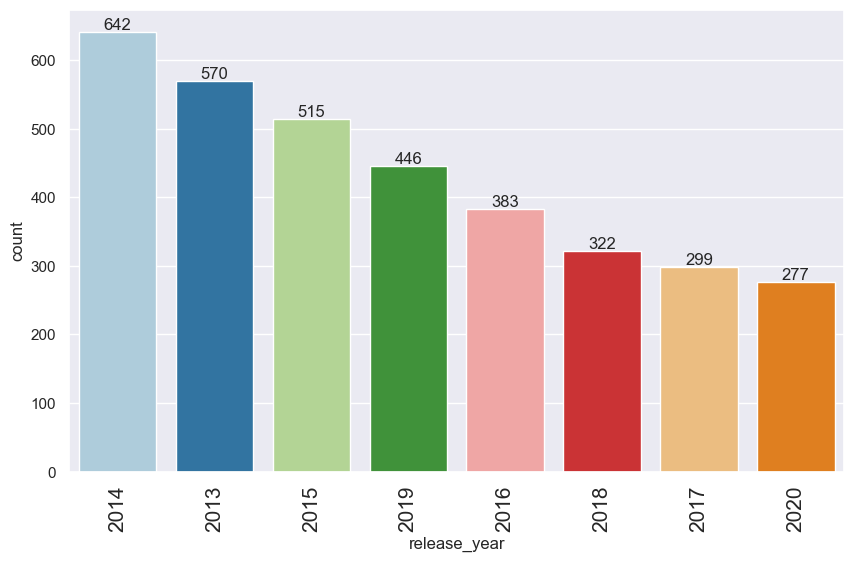

In [25]:
labeled_barplot(df, "release_year")

- The earliest release year is 2013, and the latest is 2020.
- 2014 has the most number (642) of releases and 2020 has the least number(277)

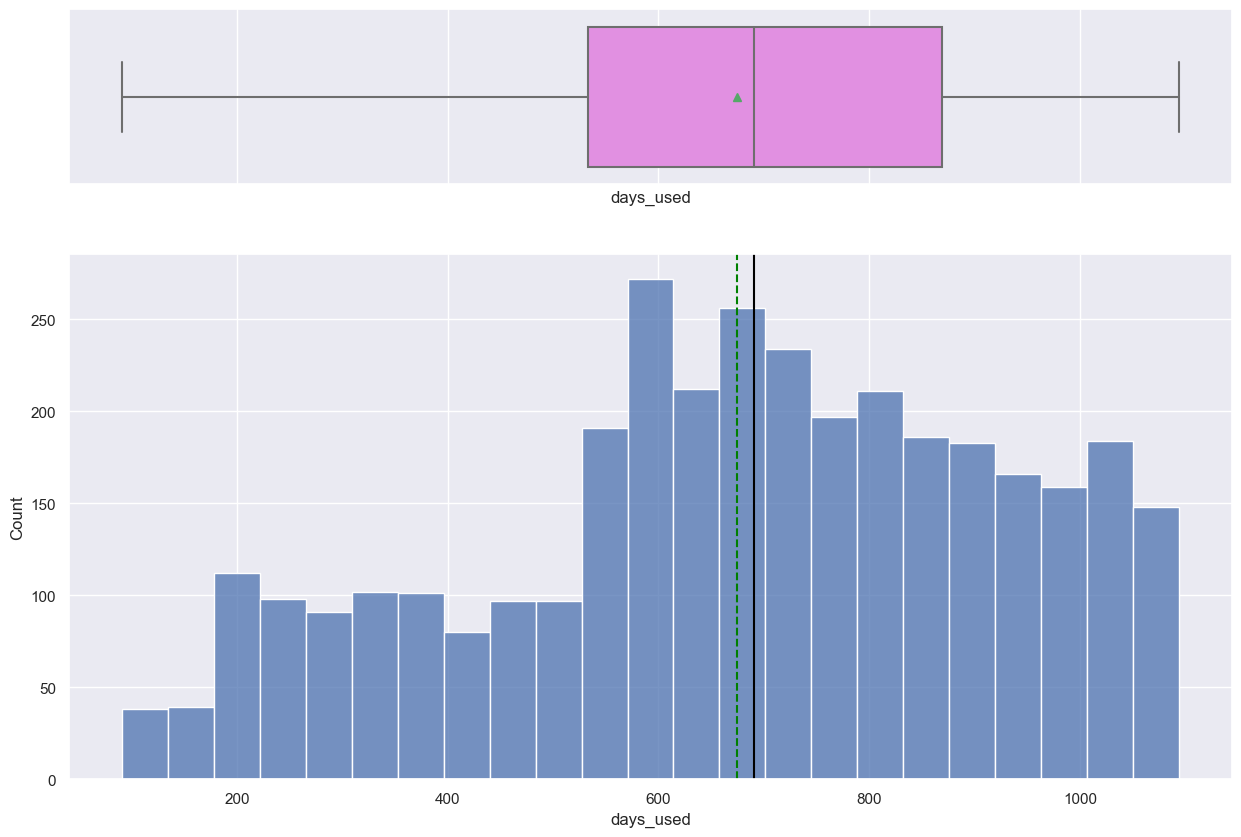

In [26]:
histogram_boxplot(df, "days_used")

- The minimum days used is 91 days, and the maximum is 1094 days.

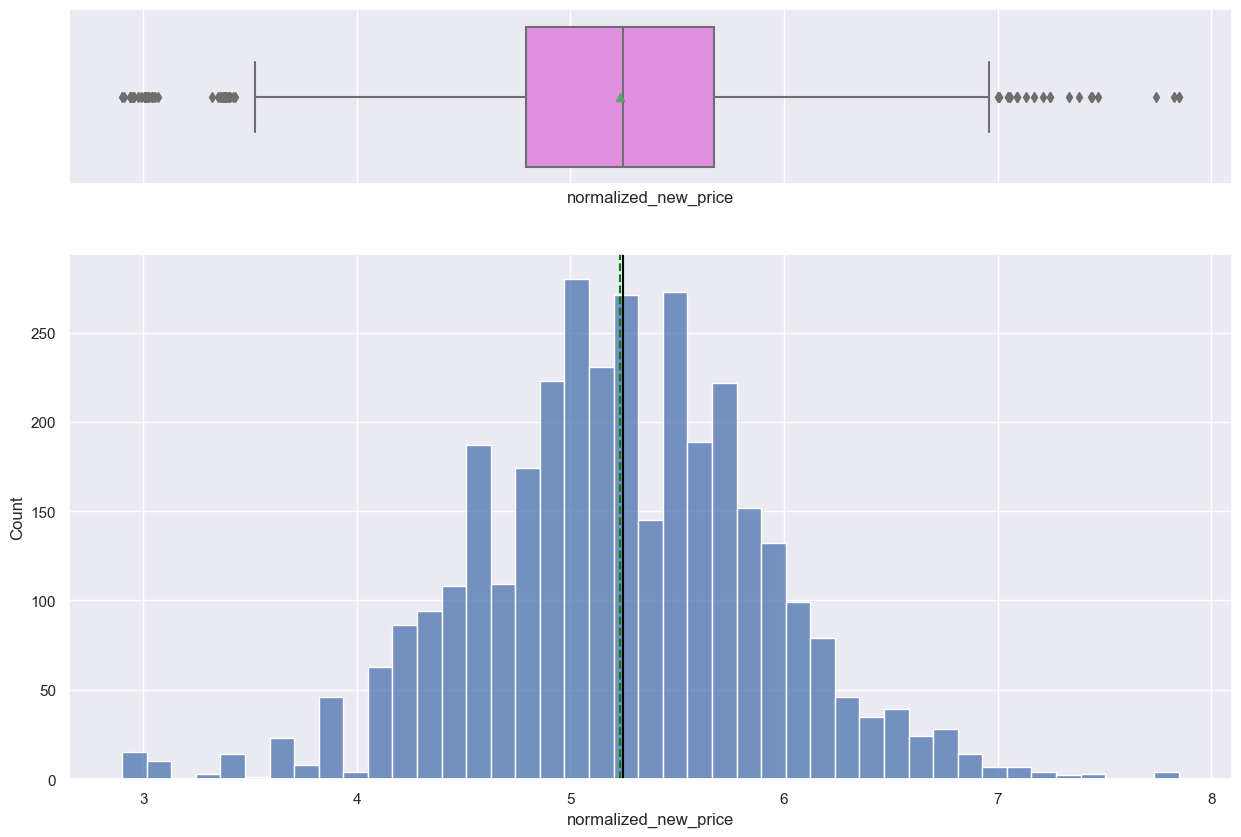

In [27]:
histogram_boxplot(df, "normalized_new_price")

- Normalized new price data is numerical, with an average of approximately 5.23 and a standard deviation of about 0.68. The minimum normalized new price is 2.90, and the maximum is 7.85.

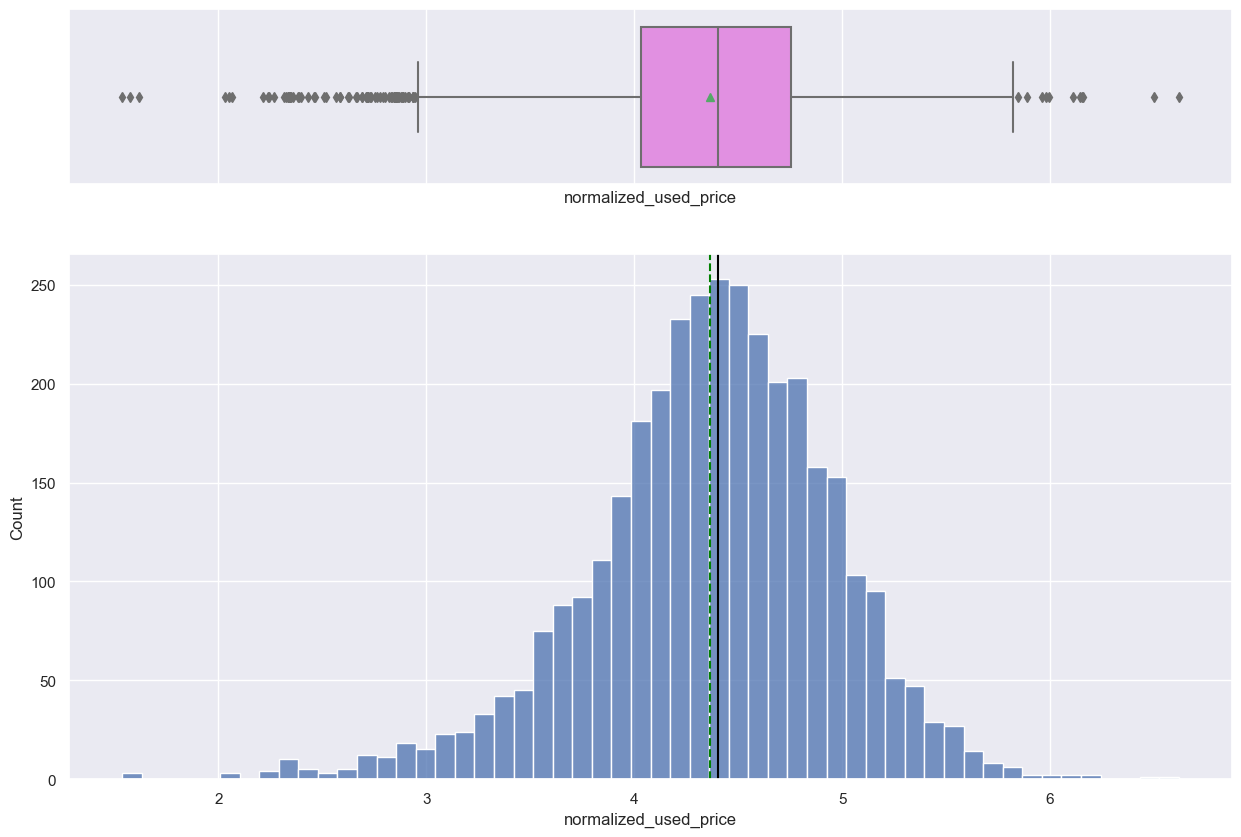

In [28]:
histogram_boxplot(df, "normalized_used_price")

- Normalized used price data is numerical, with an average of approximately 4.36 and a standard deviation of about 0.59. The minimum normalized used price is 1.54, and the maximum is 6.62.

## Bi-Variate Analysis

In [29]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove("release_year")

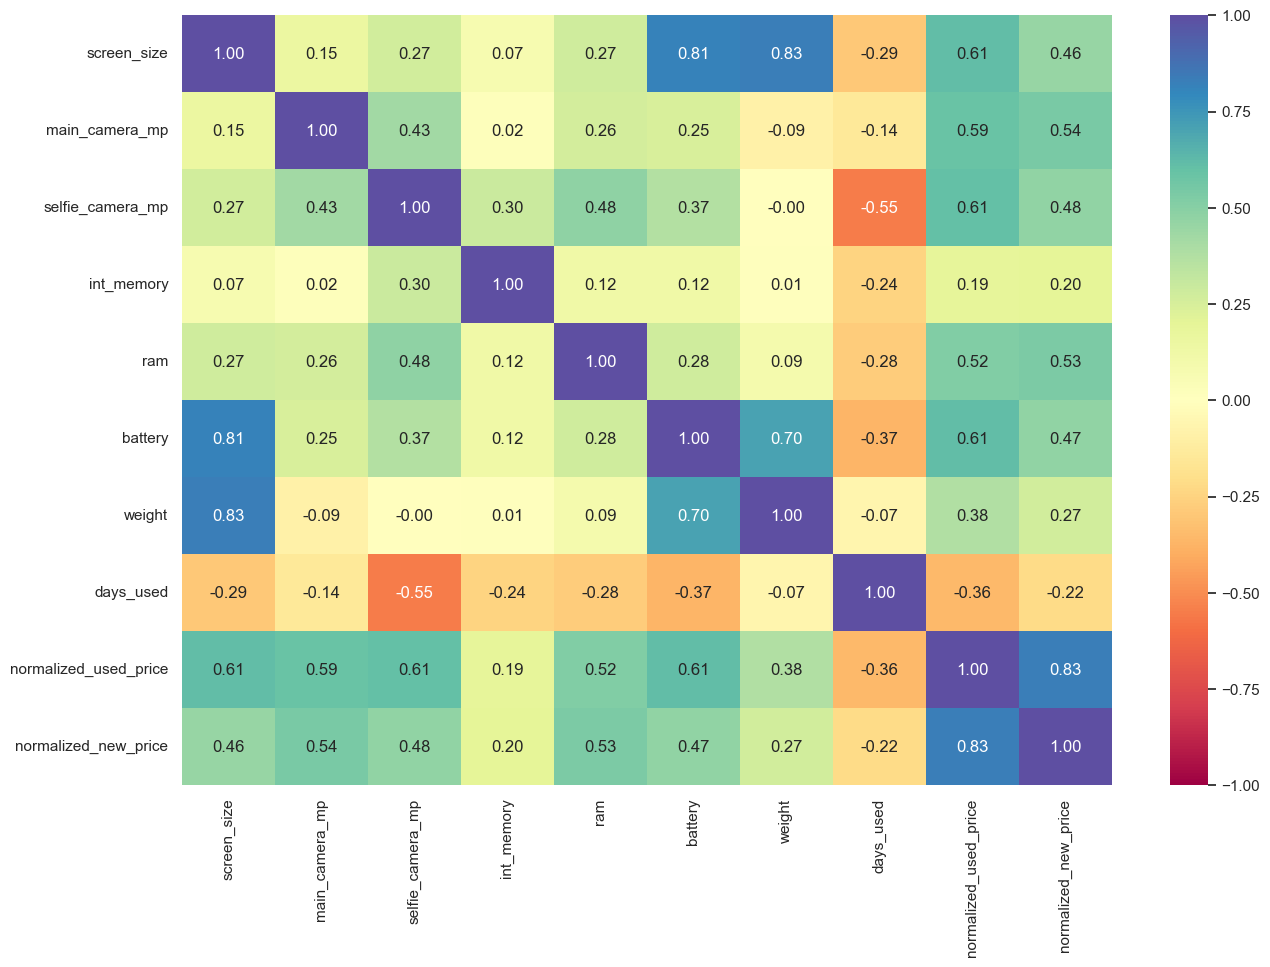

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- The Normalized used price has the highest amount of correlation with screen size , battery , main camera and selfie camera.
- We can assume they play a very important role in determining the price of used and refurbished devices.

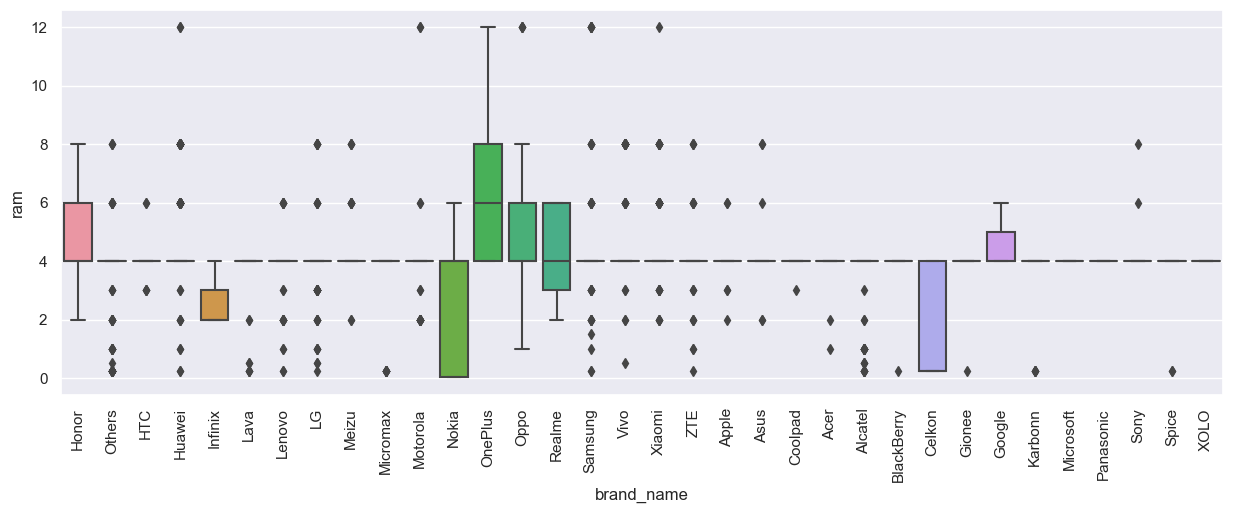

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

- We can say every brand atleast offers 4GB RAM.
- One plus offers upto 12GB RAM Space.
- Nokia offers upto 6gb RAM.
- Every Brand have a lot of outliers which we can assume some of their phone types have higher/lower RAM. 4gb RAM seems to most popular across the board.


In [32]:
large_battery = df[df.battery > 4500]
large_battery.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001


In [33]:
large_battery.shape

(341, 15)

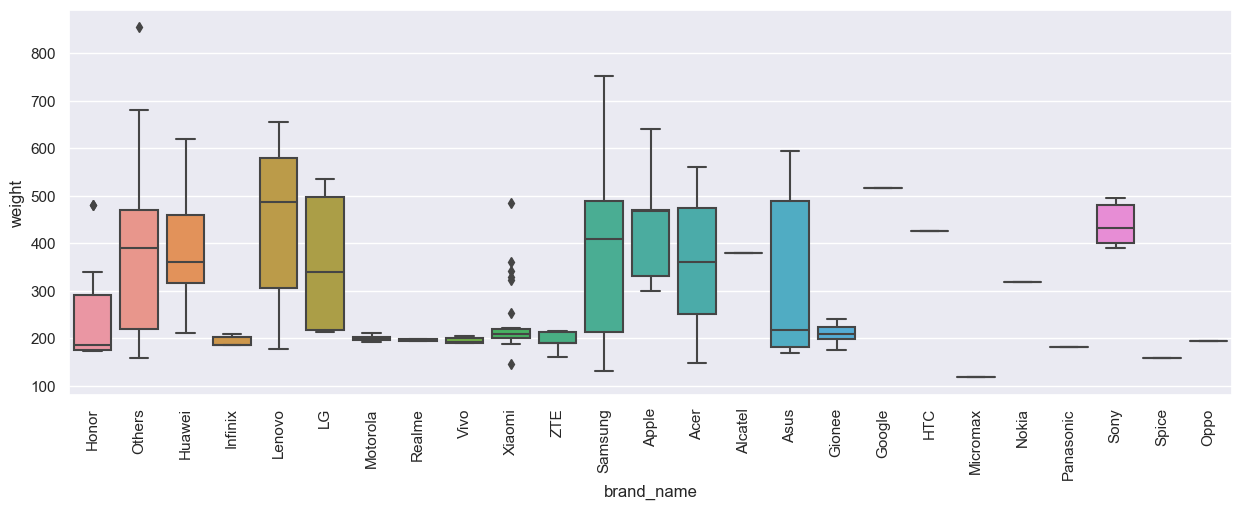

In [34]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

- There are a total of 341 phone types that have battery more than 4500 mah.
- Samsung devices range between 150 grams to 750 grams with larger battery.
- Most Devices are ranging between 200 to 500 grams.

In [35]:
data_screen_size=df[df.screen_size>6*2.54]   ## 1 inch is 2.54 cm, since the screen_size data is in cm
data_screen_size.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694


In [36]:
data_screen_size.shape

(1099, 15)

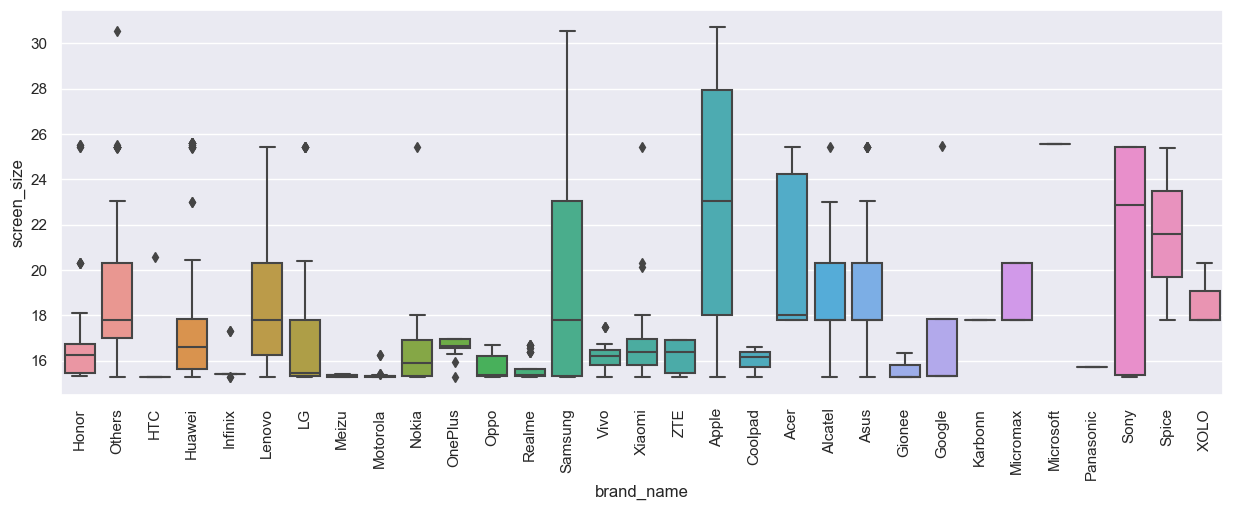

In [37]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=data_screen_size, x="brand_name", y="screen_size")
plt.xticks(rotation=90)
plt.show()

In [38]:
df_selfie_camera_mp=df[df.selfie_camera_mp>8]
df_selfie_camera_mp.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,5.383256,6.213968
13,Honor,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,2019,336,4.617593,5.398751
16,Honor,Android,15.90,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,395,5.022366,5.517935


In [39]:
df_selfie_camera_mp.shape

(655, 15)

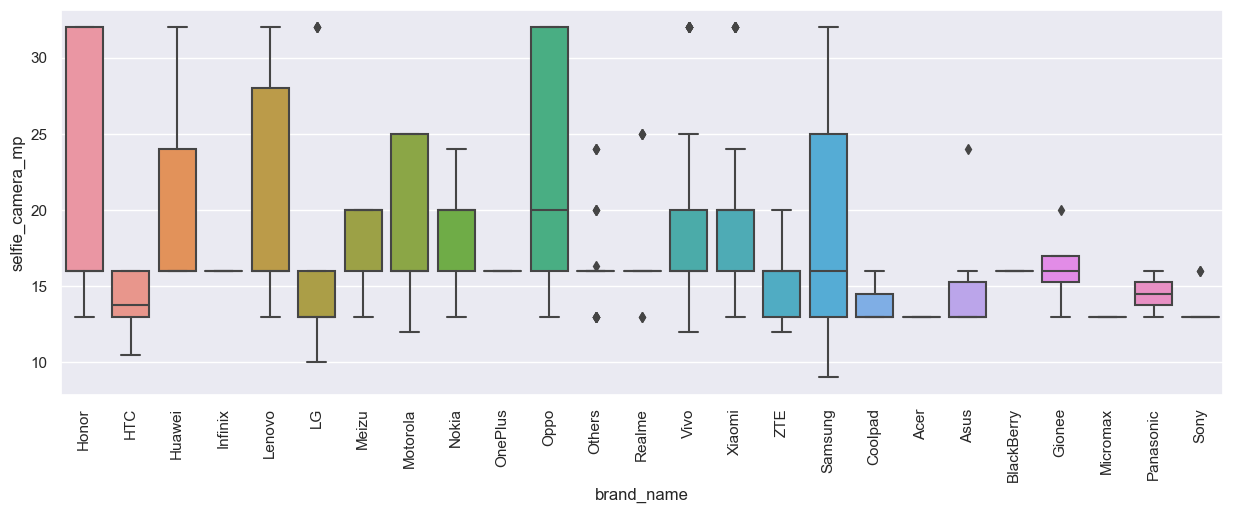

In [40]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_selfie_camera_mp, x="brand_name", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()

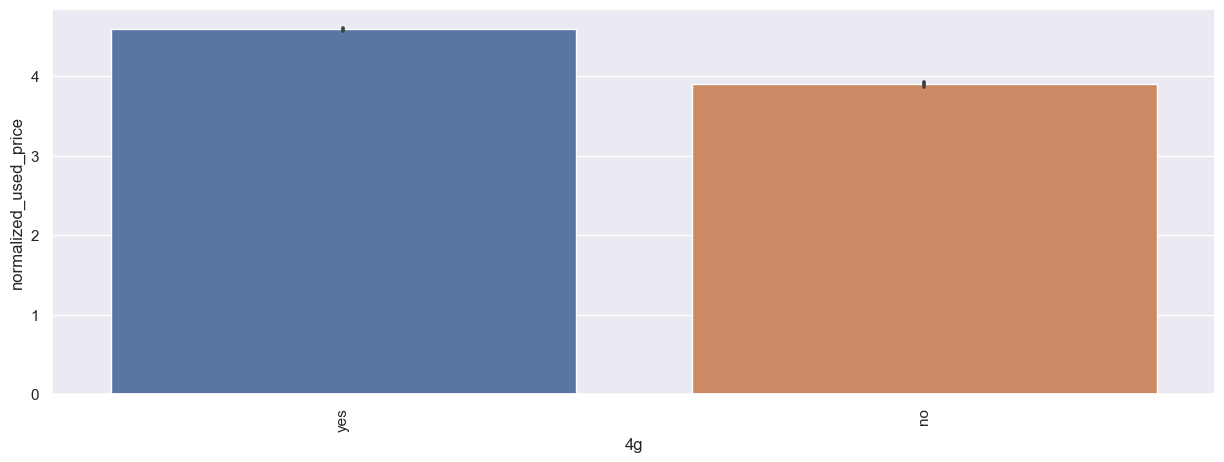

In [41]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="4g", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

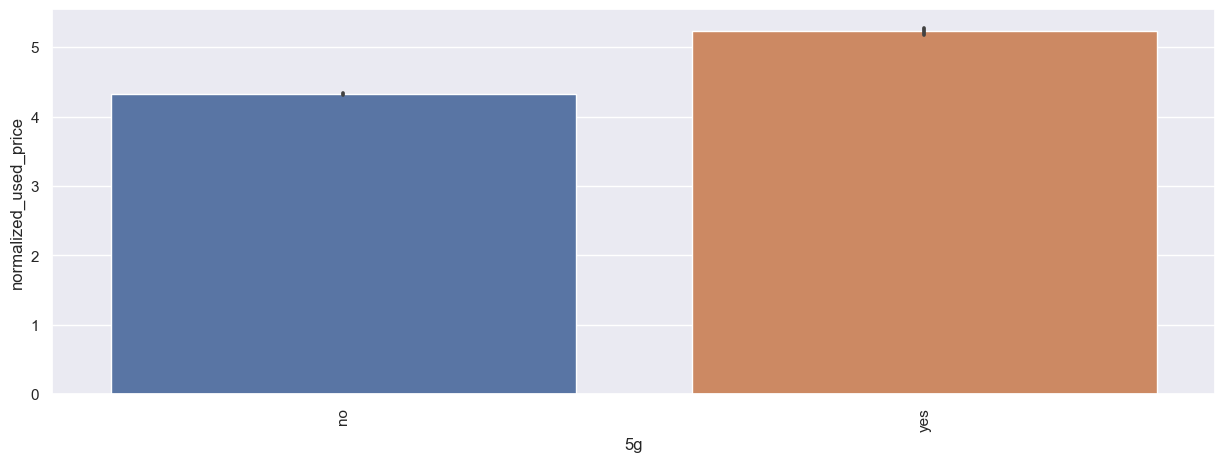

In [42]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="5g", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

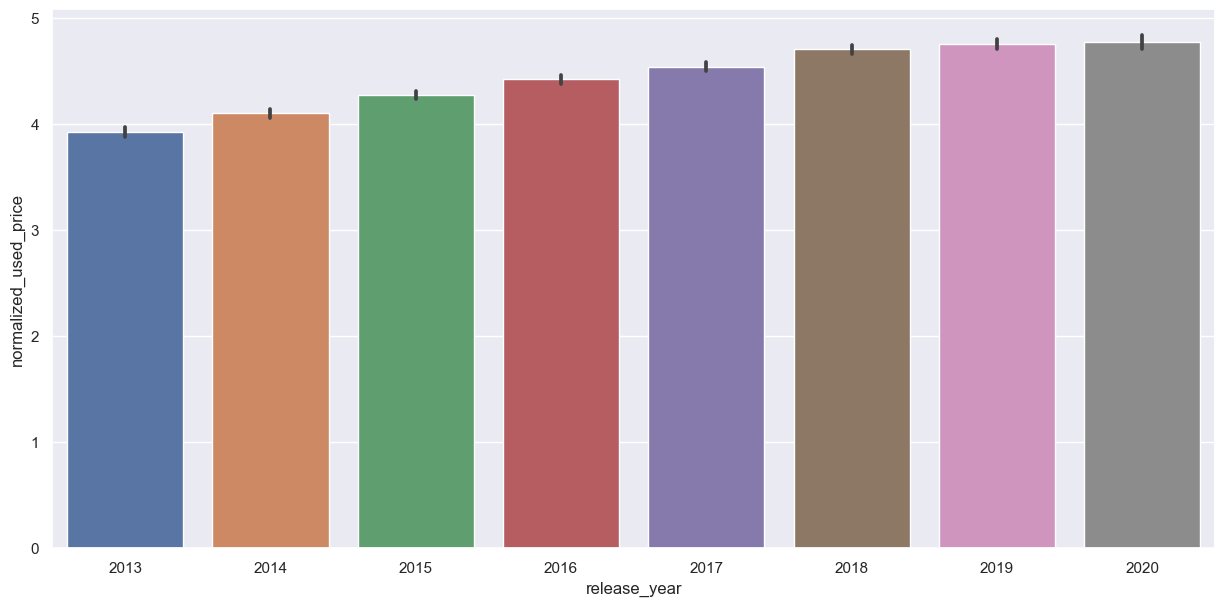

In [43]:
plt.figure(figsize=(15,7))
sns.barplot(data=data, x='release_year', y ='normalized_used_price')
plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [44]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [45]:
df1 = df.copy()

In [46]:
cols_missing = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_missing:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year', 'brand_name'])[col].transform("median")
    )

In [47]:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [48]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         2
int_memory               0
ram                      0
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [49]:
df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(df1["selfie_camera_mp"].median())

df1["battery"] = df1["battery"].fillna(df1["battery"].median())

df1["weight"] = df1["weight"].fillna(df1["weight"].median())

df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- All the missing values have been treated.

### Feature Engineering

* Let's create a new feature `years_running` by taking the difference between `2021` and `release_year` columns
* We will drop the original columns once the new feature is created as the year values themselves are not numerical in nature

In [50]:
df1["years_running"] = 2021 - df1["release_year"]
df1.drop(["release_year"], axis=1, inplace=True)
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_running
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


### Outlier Check


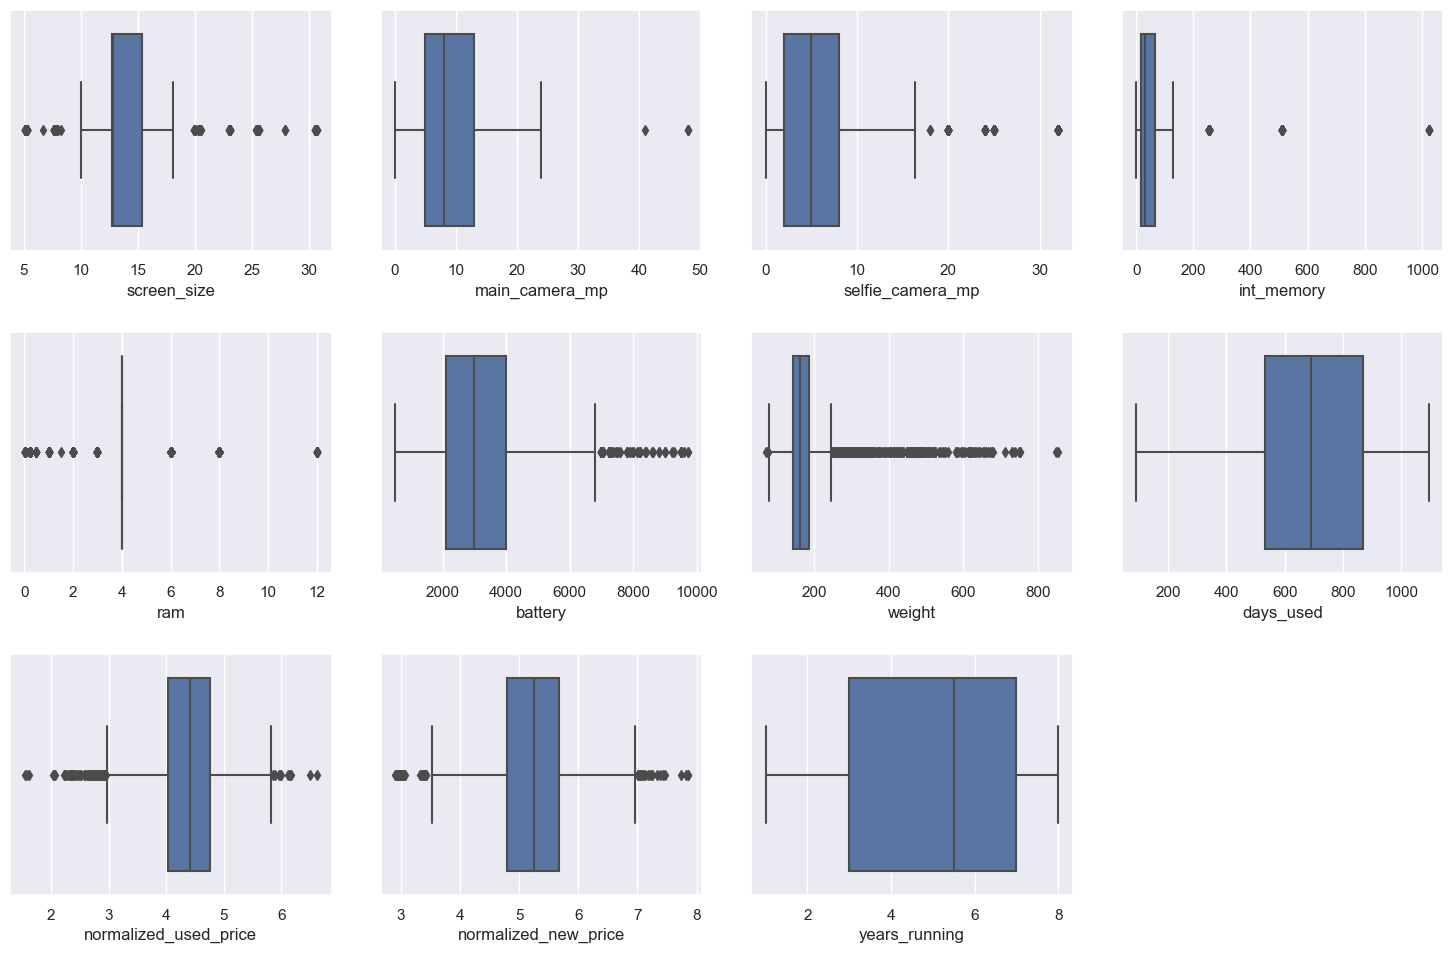

In [51]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are quite a few outliers in the data
- However, we will not treat them as they are proper values

### Data Preparation for modeling

- We want to predict the normalized price of used & refurbished devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [52]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_running  
0              4.715100              1  
1              5.519018              1  
2              5.884631              1  
3              5.630961              1  
4

In [53]:
# let's add the intercept to data
X = sm.add_constant(X)

In [54]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [2]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

NameError: name 'train_test_split' is not defined

In [56]:
print(x_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
3026   1800.0   120.0        819              4.796204  ...                 0   
1525   4050.0   225.0        585              5.434595  ...                 0   
1128   2550.0   162.0        727              5.137914  ...                 0   
3003   3200.0   160.0        800              5.189228  ...                 0   
2907   2900.0   160.0        560              5.016220  ...                 0   

      brand_name_Vivo  brand_name_XOLO

In [57]:
print(x_test.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
866     1.0        15.24            8.00               2.0        16.0  4.00   
957     1.0        10.16            3.15               0.3       512.0  0.25   
280     1.0        15.39            8.00               8.0        32.0  2.00   
2150    1.0        12.83           13.00              16.0        64.0  4.00   
93      1.0        15.29           13.00               5.0        32.0  3.00   

      battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
866    3000.0   206.0        632              5.190788  ...                 0   
957    1400.0   140.0        637              3.884652  ...                 0   
280    5000.0   185.0        329              4.487287  ...                 0   
2150   3200.0   148.0        648              5.639422  ...                 0   
93     3500.0   179.0        216              5.300415  ...                 0   

      brand_name_Vivo  brand_nam

In [58]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [1]:
x_train.columns

NameError: name 'x_train' is not defined

<Figure size 30000x20000 with 0 Axes>

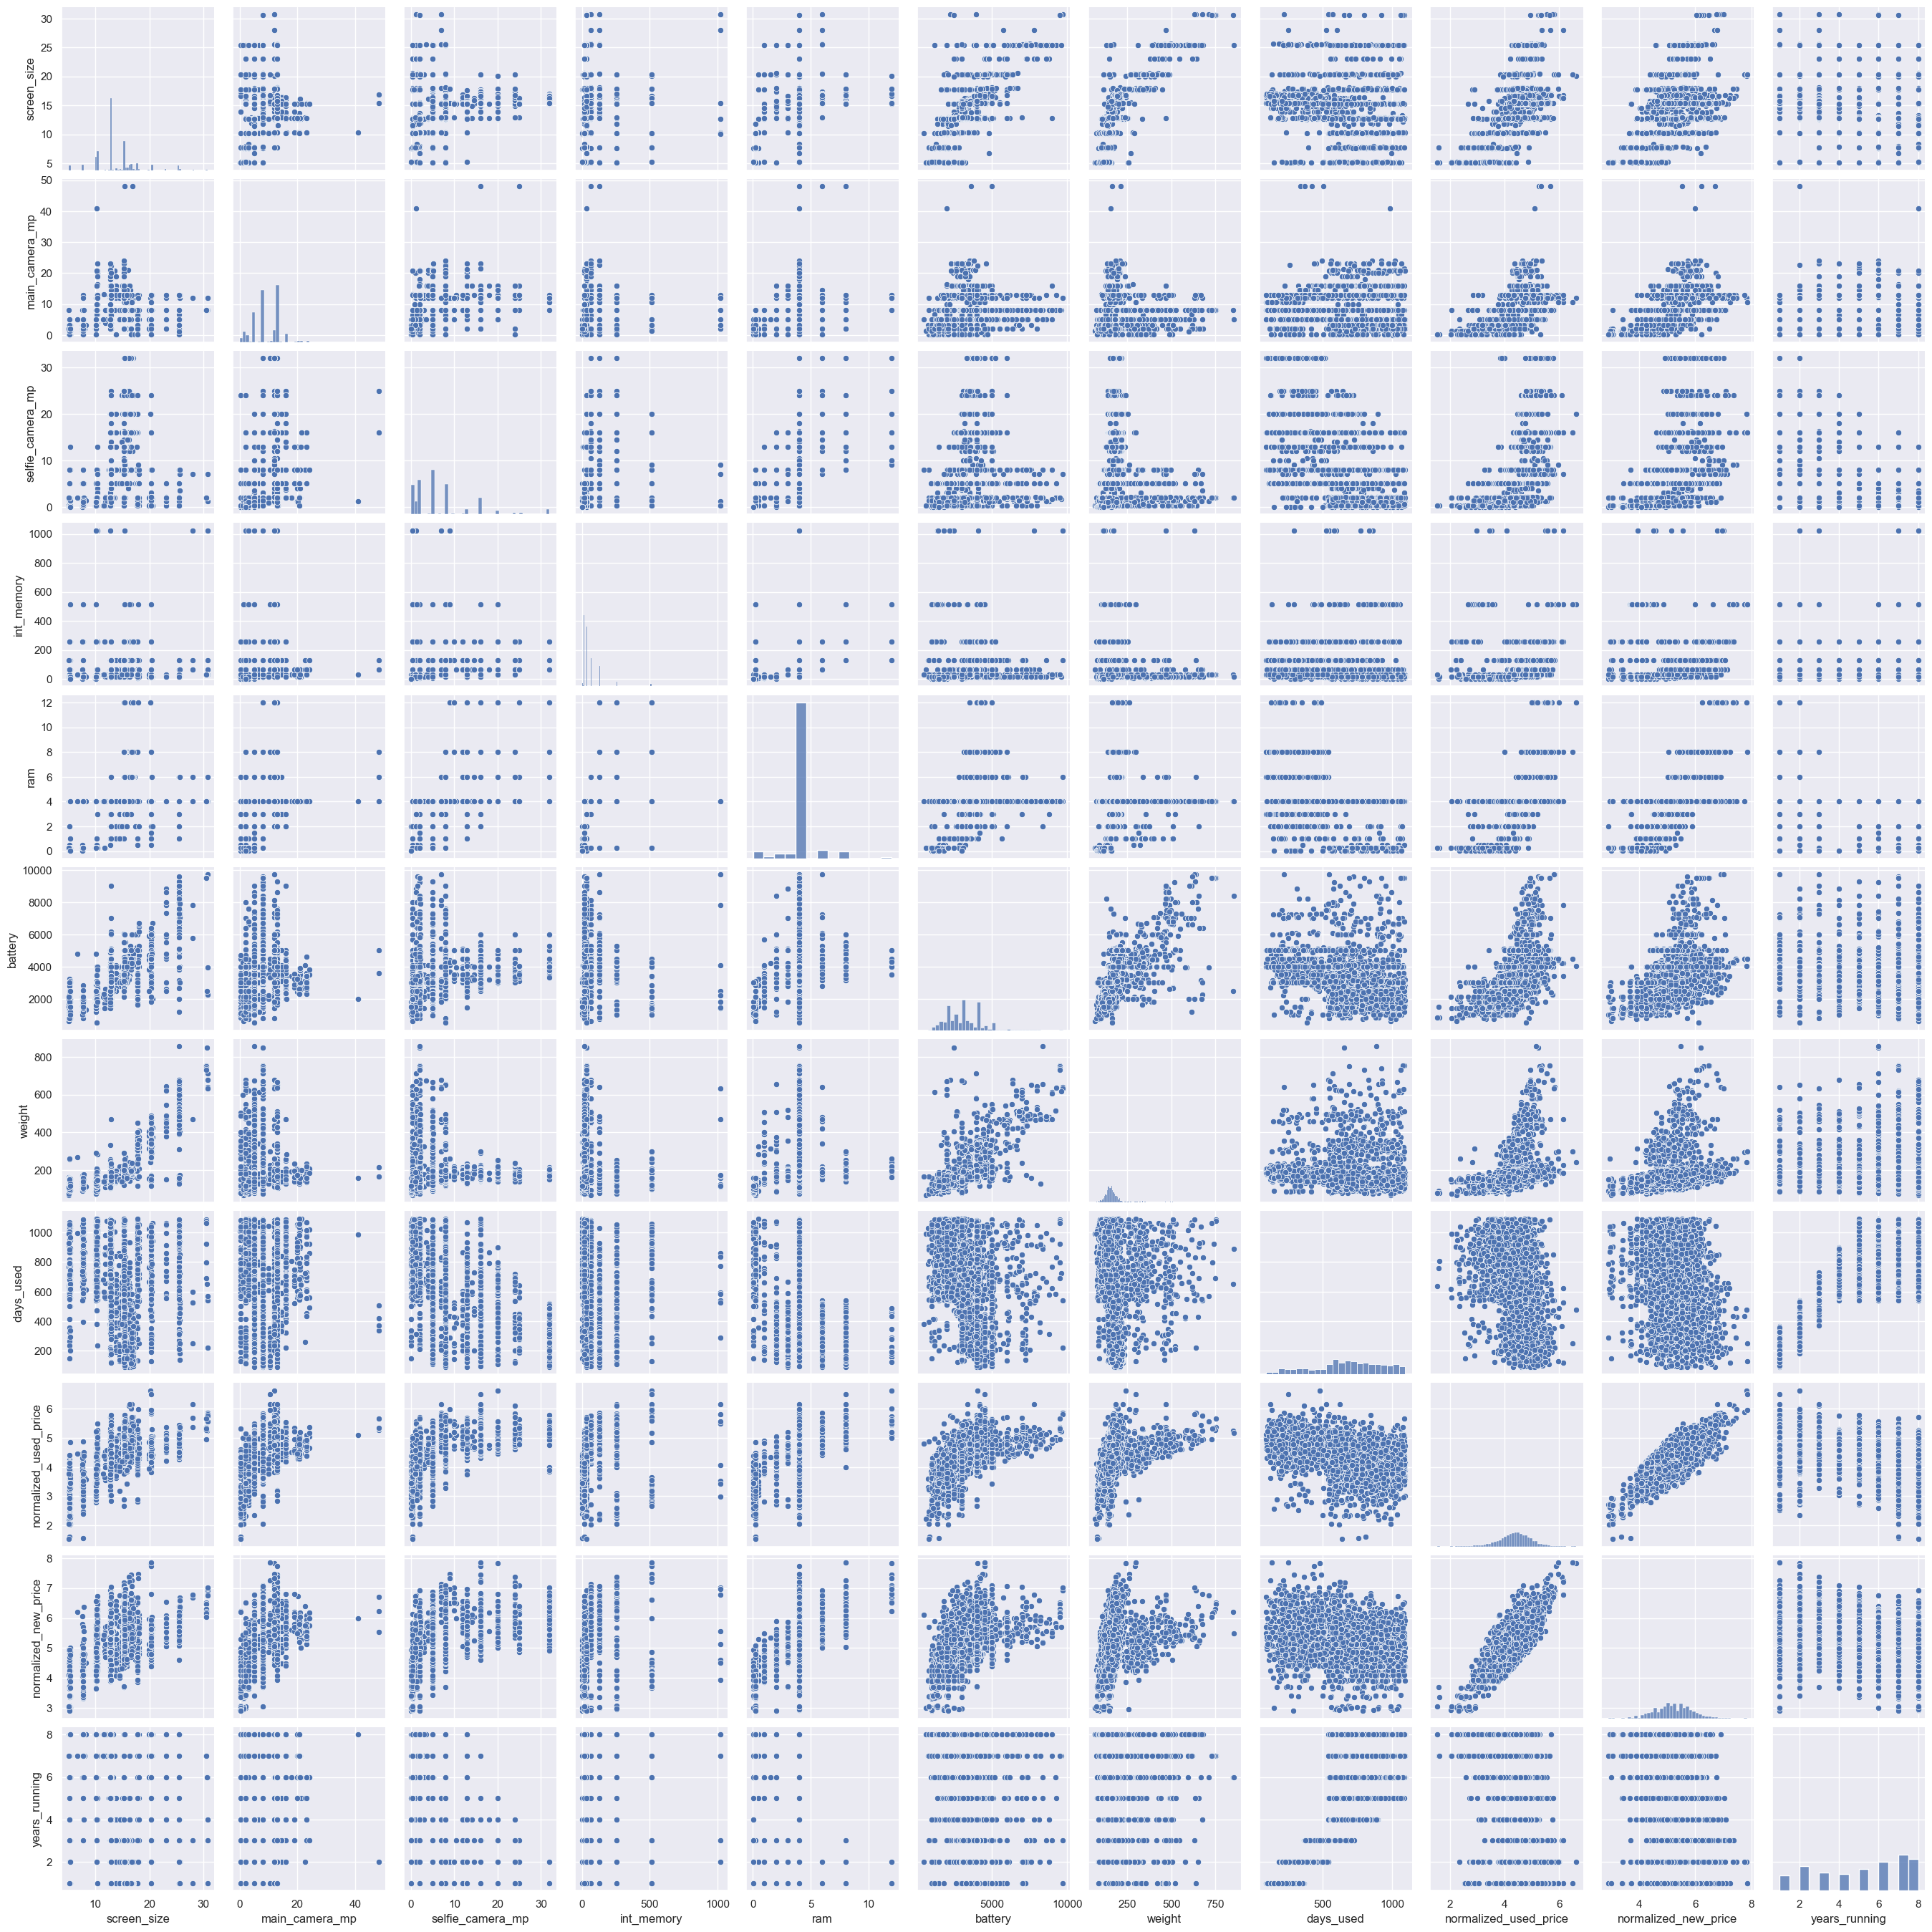

In [60]:
plt.figure(figsize=(300,200))
sns.pairplot(df1[["screen_size", "main_camera_mp", "selfie_camera_mp", "int_memory", "ram",'battery','weight','days_used','normalized_used_price','normalized_new_price','years_running']])
plt.show()

## Model Building - Linear Regression

In [61]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                           15:51:58   Log-Likelihood:                 123.94
No. Observations:                   2417   AIC:                            -149.9
Df Residuals:                       2368   BIC:                             133.8
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:




1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.842**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3285**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    -   The coefficient for "screen_size" is approximately 0.0244. This means that, on average, for every one-unit increase in "screen_size," the "normalized_used_price" is estimated to increase by 0.0244 units, assuming all other variables remain constant.

    -     The coefficient for "main_camera_mp" is approximately 0.0203. This indicates that, on average, for every one-unit increase in "main_camera_mp," the "normalized_used_price" is estimated to increase by 0.0203 units, holding all other variables constant.
    - Similarly, each predictor variable in the output has a corresponding coefficient indicating its estimated effect on the dependent variable

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [62]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [63]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229876,0.180362,0.844897,0.841686,4.327657


In [64]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23818,0.183946,0.842714,0.834906,4.483991



The model shows good performance on both the training and test datasets:

- Training R-squared (0.844) indicates that approximately 84.4 % of the variance in the dependent variable is explained by the model on the training data.
- Test R-squared (0.843) suggests that around 84.3% of the variance in the dependent variable is explained by the model on the test data.
- Both training and test RMSE and MAE values are low and comparable, indicating the model's ability to generalize well to unseen data.
- The MAPE value (4.48%) on the test data indicates that, on average, the model's predictions deviate by approximately 4.48% from the actual values, showing good accuracy in predictions.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [66]:
checking_vif(x_train)

,feature,VIF
0,const,228.667215
1,screen_size,7.680937
2,main_camera_mp,2.136962
3,selfie_camera_mp,2.810192
4,int_memory,1.361824
5,ram,2.285334
6,battery,4.073649
7,weight,6.380295
8,days_used,2.669623
9,normalized_new_price,3.121700


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [67]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [68]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838402,0.234688
1,weight,0.838149,0.234871


In [69]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,203.629457
1,main_camera_mp,2.134050
2,selfie_camera_mp,2.806637
3,int_memory,1.359659
4,ram,2.285333
5,battery,3.835520
6,weight,2.980031
7,days_used,2.657580
8,normalized_new_price,3.079122
9,years_running,4.717913


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [70]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                           15:51:58   Log-Likelihood:                 98.108
No. Observations:                   2417   AIC:                            -100.2
Df Residuals:                       2369   BIC:                             177.7
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- We can see that adj. R-squared has dropped from 0.842 to 0.838, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

In [71]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_running', 'brand_name_LG', 'brand_name_Micromax', 'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes']


In [72]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [73]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     836.9
Date:                   Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                           15:51:59   Log-Likelihood:                 82.245
No. Observations:                   2417   AIC:                            -132.5
Df Residuals:                       2401   BIC:                            -39.85
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [74]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233876,0.182827,0.839452,0.838382,4.392786


In [75]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241127,0.185871,0.838798,0.836269,4.537939


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.838, i.e., our model is able to explain 83.8% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.838
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### TEST FOR LINEARITY AND INDEPENDENCE

In [76]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.886269,0.201219
1525,4.448399,4.612933,-0.164533
1128,4.315353,4.302631,0.012722
3003,4.282068,4.265015,0.017053
2907,4.456438,4.464538,-0.008100


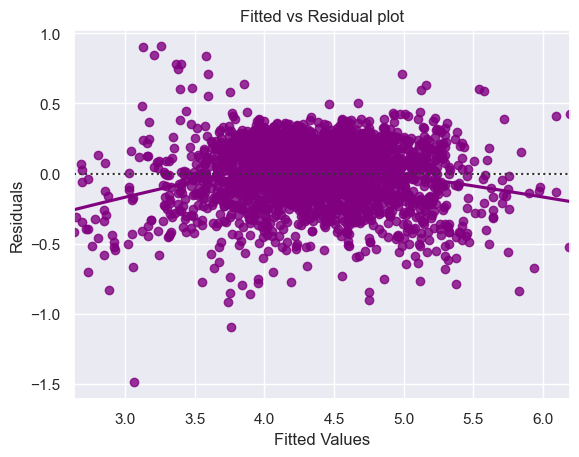

In [77]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

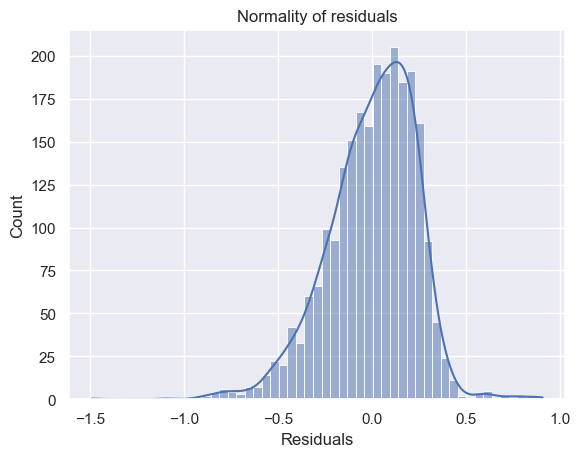

In [78]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

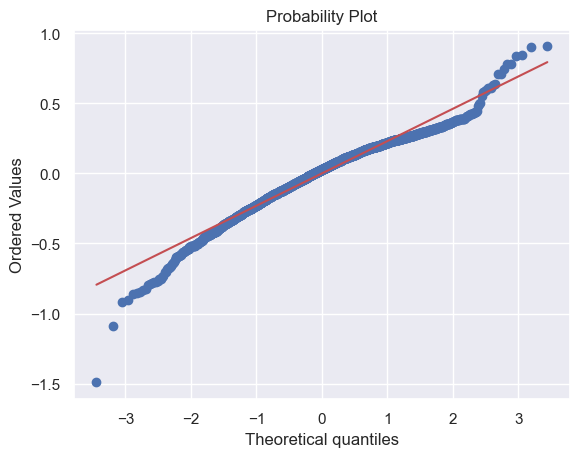

In [79]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [80]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9706727862358093, pvalue=7.824905946649752e-22)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

In [81]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.007275375508355), ('p-value', 0.45020405937406843)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

In [82]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.396703
2341,3.696103,3.983556
1913,3.592093,3.609052
688,4.306495,4.078168
650,4.522115,5.110516
2291,4.259294,4.370388
40,4.997685,5.467626
1884,3.875359,4.017099
2538,4.206631,4.040032
45,5.380450,5.301477


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

In [83]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [84]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     836.9
Date:                   Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                           15:52:00   Log-Likelihood:                 82.245
No. Observations:                   2417   AIC:                            -132.5
Df Residuals:                       2401   BIC:                            -39.85
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [85]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233876,0.182827,0.839452,0.838382,4.392786


In [86]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241127,0.185871,0.838798,0.836269,4.537939


* The model is able to explain ~83.8 % of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.5 % of the normalized_used_price

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

-  The model is able to explain ~83.8% of the variation in the data and within 4.5% of the normalized_used_price on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes
-  Feature Significance: The coefficients of predictor variables revealed the following significant influences on the normalized price:

   - Screen Size: For every one-unit increase in screen size, the normalized price is estimated to increase by 0.0244 units.
   - Main Camera MP: For every one-unit increase in main camera resolution, the normalized price is estimated to increase by 0.0203 units.
   - Other predictor variables also had significant impacts on the price.
-  Multicollinearity: There was no evidence of multicollinearity, and the dropped columns did not significantly affect the model's performance.
-  Assumptions of Linearity: The scatter plot of residuals vs. fitted values showed no pattern, indicating linearity and independence assumptions were satisfied.
-  Residual Normality: While the residuals were not perfectly normal according to the Shapiro-Wilk test, they were close enough to be considered approximately normal.
-  Homoscedasticity: The residuals were homoscedastic, satisfying the assumption.
-  Pricing Strategy: The linear regression model has proven to be effective in predicting the price of used and refurbished devices with a high level of accuracy. ReCell can use this model to set dynamic pricing strategies for their products based on the attributes of each device. By considering factors like screen size, camera resolution, memory, and others, ReCell can optimize their pricing to attract more customers while maximizing revenue.
-  Promote 4G and 5G Devices: The availability of 4G and 5G connectivity options positively impacts the device's price. As the market moves towards faster and more efficient network technologies, ReCell should focus on promoting devices with 4G and 5G capabilities to meet the increasing demand for such devices
-  Consider Brand Reputation: Brand reputation plays a significant role in consumers' purchasing decisions. ReCell should carefully curate their inventory to include popular and well-known brands that are highly regarded in the market. This can help attract more customers and instill confidence in their products.
-  Continuous Market Analysis: The used device market is dynamic and can be influenced by various factors, including new device releases, consumer preferences, and economic conditions. ReCell should continuously analyze market trends and customer feedback to adapt their pricing and product offerings accordingly.
-  Improve Customer Experience: Providing excellent customer service and a seamless buying experience will lead to increased customer satisfaction and repeat business. ReCell should focus on streamlining the purchasing process, offering responsive support, and addressing customer concerns promptly.

By incorporating these actionable insights and recommendations into their business strategy, ReCell can position itself as a competitive player in the growing used and refurbished device market and capitalize on its rising potential.

___